In [11]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False # if you want to see training set to true

epsilon = 0.9


In [12]:
rewards = []
for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):
    
    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()  
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done: 
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

[[3.97166046e-01 2.99112645e-02 2.92195042e-02 2.98052957e-02]
 [8.27975182e-03 7.97650537e-03 6.11605412e-03 1.96828378e-01]
 [6.17691085e-03 7.16384019e-03 5.12392473e-03 1.20531103e-01]
 [9.12859801e-03 1.61655734e-03 7.80991860e-04 3.94166947e-02]
 [3.60796074e-01 2.51770862e-03 1.25040458e-03 3.69132031e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.21628761e-06 3.42205994e-06 9.55519484e-02 2.94529418e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.07301265e-03 2.98516378e-03 4.96986813e-03 5.42460665e-01]
 [3.66505323e-03 6.29914051e-01 7.84132708e-03 3.78303694e-03]
 [7.61252172e-01 4.10035732e-04 4.59496374e-04 1.54318090e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.68075315e-02 2.69270918e-02 7.34900323e-01 3.85163340e-02]
 [1.05079939e-01 1.08000229e-01 9.65968282e-01 7.09537071e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

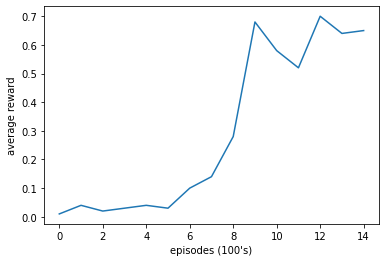

In [13]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()